In [1]:
#common
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.pyplot import figure
%matplotlib inline

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import  GridSearchCV 
from sklearn.metrics import classification_report

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")




Bad key "text.kerning_factor" on line 4 in
/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In this file, I have changed  the percentage features and all the vegetation features into the baskets

Preprocess the data  
A) Encode the categorical features  
B) Abbreviate the column names  
C) Standardize the numerical features  
D) Handle NaNs (either fill them with Median values or make a better choice if available)  
E) Convert percentage to value/100 (check which option gives better result, as-is or divided/100)  
F) Scale the vegetation features (ndvi*) as 0, 1 (0 <= 0.25 and 1 > 0.25) as it is in scale of 0 to 0.5. Retain as is or use other scaling based on how model performs.  
G) Make an 80-20 train-test split  

In [2]:
df = pd.read_csv('dengue_features_train.csv')

#  Preprocessing

In [3]:
#Changing the type to categorical value
df.year = df.year.astype('category')
df.city = df.city.astype('category')

In [4]:
#Abbreviating the column names  
d = {'station': 'stn', 'reanalysis': 're_an','humidity': 'hd','precipitation':'prec'}

def replace_all(text, dic):
    for i, j in dic.items():
        text.columns = text.columns.str.replace(i, j)
    return text

replace_all(df,d)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_precip_amt_kg_per_m2,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [5]:
# drop prec_amt_mm and re_an_dew_point_temp_k

In [6]:
lb = pd.read_csv('dengue_labels_train.csv')

In [7]:
lb.year = lb.year.astype('category')

In [8]:
#Merge data
df_merged = df.merge(lb,on=['city','year','weekofyear'],how='inner')

In [9]:
#Handling of NaNs
df_merged.fillna(method='ffill',inplace=True)

In [10]:
df_merged["total_cases"] = df_merged["total_cases"].astype('float64')

In [11]:
df_merged.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'prec_amt_mm', 're_an_air_temp_k',
       're_an_avg_temp_k', 're_an_dew_point_temp_k', 're_an_max_air_temp_k',
       're_an_min_air_temp_k', 're_an_precip_amt_kg_per_m2',
       're_an_relative_hd_percent', 're_an_sat_precip_amt_mm',
       're_an_specific_hd_g_per_kg', 're_an_tdtr_k', 'stn_avg_temp_c',
       'stn_diur_temp_rng_c', 'stn_max_temp_c', 'stn_min_temp_c',
       'stn_precip_mm', 'total_cases'],
      dtype='object')

# Convert percentage to value/100 (check which option gives better result, as-is or divided/100)  

In [12]:
df_merged.re_an_relative_hd_percent = df_merged.re_an_relative_hd_percent /100

# Scale the vegetation features (ndvi*) as 0, 1 (0 <= 0.25 and 1 > 0.25) 

In [13]:
veg_feat = ['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']

for ndvi_ in veg_feat:
    df_merged[ndvi_] = pd.cut(x=df_merged[ndvi_], bins=[0,0.25,0.5], labels=[0,1])

On a closer look, there are few values which are less than 0. 

In [14]:
df_merged.isna().sum()

city                            0
year                            0
weekofyear                      0
week_start_date                 0
ndvi_ne                       215
ndvi_nw                       183
ndvi_se                         2
ndvi_sw                         5
prec_amt_mm                     0
re_an_air_temp_k                0
re_an_avg_temp_k                0
re_an_dew_point_temp_k          0
re_an_max_air_temp_k            0
re_an_min_air_temp_k            0
re_an_precip_amt_kg_per_m2      0
re_an_relative_hd_percent       0
re_an_sat_precip_amt_mm         0
re_an_specific_hd_g_per_kg      0
re_an_tdtr_k                    0
stn_avg_temp_c                  0
stn_diur_temp_rng_c             0
stn_max_temp_c                  0
stn_min_temp_c                  0
stn_precip_mm                   0
total_cases                     0
dtype: int64

In [15]:
df_merged.fillna(method='ffill',inplace=True)

# Feature Selection

In [16]:
#Features and labels
X_draft = df_merged.drop(['week_start_date',
                    're_an_sat_precip_amt_mm', #repeatative
                    're_an_specific_hd_g_per_kg', #repeatative
                    're_an_precip_amt_kg_per_m2', #low correlation with tota_cases
                    're_an_air_temp_k', #multicollinearity with re_an_avg_temp_k
                    're_an_max_air_temp_k', #keeping re_an_tdtr_k: Diurnal temperature range
                    're_an_min_air_temp_k',
                    'stn_max_temp_c', #We have Average temperature.
                    'stn_min_temp_c',
                    'total_cases'],axis=1)
y = df_merged['total_cases']

Encoding the Categorical feeatures

In [17]:
cat_feature = ["city", 'year']
#convert the attributes to categorical form
for i in cat_feature:
    X_draft[i] = X_draft[i].astype("category")
    X_draft[i] = X_draft[i].astype("category")

#Convert categorical variable into dummy/indicator variables
X_conv = pd.get_dummies(X_draft[['city','year']])

In [52]:
X_conv.columns

Index(['city_iq', 'city_sj', 'year_1990', 'year_1991', 'year_1992',
       'year_1993', 'year_1994', 'year_1995', 'year_1996', 'year_1997',
       'year_1998', 'year_1999', 'year_2000', 'year_2001', 'year_2002',
       'year_2003', 'year_2004', 'year_2005', 'year_2006', 'year_2007',
       'year_2008', 'year_2009', 'year_2010'],
      dtype='object')

StandardScaler

In [18]:

X_draft.columns

Index(['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'prec_amt_mm', 're_an_avg_temp_k', 're_an_dew_point_temp_k',
       're_an_relative_hd_percent', 're_an_tdtr_k', 'stn_avg_temp_c',
       'stn_diur_temp_rng_c', 'stn_precip_mm'],
      dtype='object')

In [19]:
X_numeric = X_draft.drop(columns=['city', 'year'], axis=1)


scaler = StandardScaler()


#Applying the StandardScaler to all the numerical data
X_scaled = scaler.fit_transform(X_numeric)
X = np.concatenate((X_scaled,np.array(X_conv)),axis=1)

In [20]:
X_numeric.columns

Index(['weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'prec_amt_mm',
       're_an_avg_temp_k', 're_an_dew_point_temp_k',
       're_an_relative_hd_percent', 're_an_tdtr_k', 'stn_avg_temp_c',
       'stn_diur_temp_rng_c', 'stn_precip_mm'],
      dtype='object')

In [21]:
X_conv.shape

(1456, 23)

Train test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [23]:
type(X_test)

numpy.ndarray

# LinearSVR

In [24]:
linear_svr_reg = LinearSVR(C=3,max_iter=2000)


In [25]:
linear_svr_reg.fit(X_train,y_train)


LinearSVR(C=3, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=2000,
          random_state=None, tol=0.0001, verbose=0)

In [26]:
y_predict = linear_svr_reg.predict(X_test)

In [27]:
mae = mean_absolute_error(y_test, y_predict)
print("Mean Absolute Error: " ,mae)

Mean Absolute Error:  14.33177034245339


In [28]:
def plot_learning_curves(model):
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_test)
        train_errors.append(mean_absolute_error(y_train[:m], y_train_predict))
        val_errors.append(mean_absolute_error(y_test, y_val_predict))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="test")

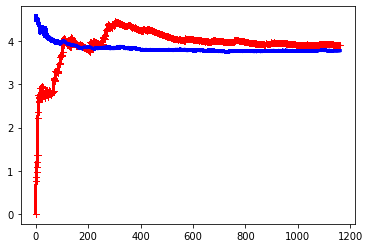

In [29]:
plot_learning_curves(linear_svr_reg)

# SVR

In [30]:
svr_reg = SVR(degree=4,kernel='linear',C=10)

In [31]:
svr_reg.fit(X_train,y_train)

SVR(C=10, cache_size=200, coef0=0.0, degree=4, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
y_predict1 = svr_reg.predict(X_test)

In [33]:
mae = mean_absolute_error(y_test, y_predict1)
print("Mean Absolute Error: " ,mae)

Mean Absolute Error:  14.267880886417938


In [34]:
def plot_learning_curves1(model):
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_test)
        train_errors.append(mean_absolute_error(y_train[:m], y_train_predict))
        val_errors.append(mean_absolute_error(y_test, y_val_predict))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="test")

KeyboardInterrupt: 

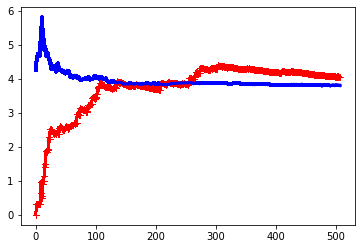

In [35]:
plot_learning_curves1(svr_reg)

# Analysis of models used :   

Using Features as it is:  
    - LinearSVR:          C=100,max_iter=2000                          MAE: 16.98
    - SVR:                degree=4,kernel='linear',C=13                MAE: 17.044
    - GridSearchCV        SVR(kernel='linear', gamma=0.1),
                          param_grid={"C": [1, 10, 100, 1000],})       MAE: 16.98

Using Features with scaling:
    - LinearSVR          C=3,max_iter=2000                             MAE: 16.61
                         C =100, max_iter=2000                         MAE: 16.41
    - SVR                degree=4,kernel='linear',C=10                 MAE: 16.43
    
    


In [36]:
test_dataset  =  pd.read_csv('dengue_features_test.csv')

# Preprocessing on Test File

In [37]:
#Changing the type to categorical value
test_dataset.year = test_dataset.year.astype('category')
test_dataset.city = test_dataset.city.astype('category')

#Abbreviating the column names  
d = {'station': 'stn', 'reanalysis': 're_an','humidity': 'hd','precipitation':'prec'}

def replace_all(text, dic):
    for i, j in dic.items():
        text.columns = text.columns.str.replace(i, j)
    return text

replace_all(test_dataset,d)

#Handling of NaNs
test_dataset.fillna(method='ffill',inplace=True)

#Conversions
test_dataset.re_an_relative_hd_percent = test_dataset.re_an_relative_hd_percent /100

veg_feat = ['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']

for ndvi_ in veg_feat:
    test_dataset[ndvi_] = pd.cut(x=test_dataset[ndvi_], bins=[0,0.25,0.5], labels=[0,1])
    

test_dataset.fillna(method='ffill',inplace=True)

    
#Features and labels
X_test_draft = test_dataset.drop(['week_start_date',
                    're_an_sat_precip_amt_mm', #repeatative
                    're_an_specific_hd_g_per_kg', #repeatative
                    're_an_precip_amt_kg_per_m2', #low correlation with tota_cases
                    're_an_air_temp_k', #multicollinearity with re_an_avg_temp_k
                    're_an_max_air_temp_k', #keeping re_an_tdtr_k: Diurnal temperature range
                    're_an_min_air_temp_k',
                    'stn_max_temp_c', #We have Average temperature.
                    'stn_min_temp_c'],axis=1)




In [38]:
X_test_draft.isna().sum()

city                         0
year                         0
weekofyear                   0
ndvi_ne                      4
ndvi_nw                      4
ndvi_se                      0
ndvi_sw                      0
prec_amt_mm                  0
re_an_avg_temp_k             0
re_an_dew_point_temp_k       0
re_an_relative_hd_percent    0
re_an_tdtr_k                 0
stn_avg_temp_c               0
stn_diur_temp_rng_c          0
stn_precip_mm                0
dtype: int64

In [39]:
X_test_draft.dropna(inplace=True)

In [40]:
cat_feature = ["city", 'year']
#convert the attributes to categorical form
for i in cat_feature:
    X_test_draft[i] = X_test_draft[i].astype("category")
    X_test_draft[i] = X_test_draft[i].astype("category")



In [41]:
X_test_numeric = X_test_draft.drop(columns=['city', 'year'], axis=1)


X_test_draft['year'] = X_test_draft.year.astype('category')
dummy_attributes = X_test_draft[['city', 'year',
                                    'ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw']]

X_test_dummies = dummy_attributes.reindex(columns = X_conv.columns, fill_value=0)

test_df_standardized = scaler.transform(X_test_numeric)
test_df_np = np.concatenate((test_df_standardized,np.array(X_test_dummies)),axis=1)

In [42]:
X_test_dummies.shape

(412, 23)

In [43]:
X_test_numeric.shape

(412, 13)

In [44]:
X_test_numeric.columns

Index(['weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'prec_amt_mm',
       're_an_avg_temp_k', 're_an_dew_point_temp_k',
       're_an_relative_hd_percent', 're_an_tdtr_k', 'stn_avg_temp_c',
       'stn_diur_temp_rng_c', 'stn_precip_mm'],
      dtype='object')

# Applying svr_reg model with degree=4,kernel='linear',C=10

In [45]:
test_y_predict = svr_reg.predict(test_df_np)


In [46]:
len(test_y_predict)

412

In [47]:
final= X_test_draft[["city", "year","weekofyear"]]


In [48]:
final.shape

(412, 3)

In [49]:
final["total_cases"] = test_y_predict


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
final.to_csv("submission.csv",index=False)

For me stochastic gradient descent worked better!!! 